In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [121]:
titanic =  pd.read_csv("./titanic-passengers.csv", sep=';')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [60]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)
titanic.dropna(axis='index', inplace=True)

In [123]:
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.drop('Name', axis=1, inplace=True)

In [124]:
titanic.drop('Ticket', axis=1, inplace=True)

In [125]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,male,28.000000,0,0,13.0000,S
1,No,3,male,25.000000,0,0,7.6500,S
2,No,3,male,20.000000,0,0,7.8542,S
3,No,3,female,29.000000,0,4,21.0750,S
4,No,1,male,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,30.0708,C
887,No,3,male,22.000000,0,0,7.2292,C
888,No,3,female,30.000000,0,0,8.6625,S
889,No,3,male,29.699118,0,0,7.8958,S


In [126]:
titanic.loc[:,"Fare_recode"] = pd.cut(titanic.Fare,retbins=True,bins = (-0.001,25,50,75,100,513))[0]
pd.cut(titanic.Fare,retbins=True,bins = (-0.001,25,50,75,100,513))[0]

0      (-0.001, 25.0]
1      (-0.001, 25.0]
2      (-0.001, 25.0]
3      (-0.001, 25.0]
4        (50.0, 75.0]
            ...      
886      (25.0, 50.0]
887    (-0.001, 25.0]
888    (-0.001, 25.0]
889    (-0.001, 25.0]
890      (25.0, 50.0]
Name: Fare, Length: 889, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 25.0] < (25.0, 50.0] < (50.0, 75.0] < (75.0, 100.0] < (100.0, 513.0]]

In [54]:
titanic.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Fare_recode    0
dtype: int64

# REGRESSION LOGISTIC

In [127]:
#convertion de la variable "survie" et "Sex" en variable numeric"
titanic["Survived"]=titanic["Survived"].map({"Yes": 1, "No": 0})

In [144]:
titanic["Sex"]=titanic["Sex"].map({"male": 1, "female": 0})

In [128]:
titanic["Embarked"]=titanic["Embarked"].map({"S": 1,"C": 2,"Q": 3})

In [129]:
titanic["Fare_recode"].value_counts()

(-0.001, 25.0]    557
(25.0, 50.0]      174
(50.0, 75.0]       63
(100.0, 513.0]     53
(75.0, 100.0]      42
Name: Fare_recode, dtype: int64

In [131]:
titanic.dtypes

Survived          int64
Pclass            int64
Sex              object
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked          int64
Fare_recode    category
dtype: object

In [136]:
titanic["Fare_recode"] = titanic["Fare_recode"].cat.rename_categories([1, 2, 3,4,5])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_recode
0,0,2,male,28.000000,0,0,13.0000,1,1
1,0,3,male,25.000000,0,0,7.6500,1,1
2,0,3,male,20.000000,0,0,7.8542,1,1
3,0,3,female,29.000000,0,4,21.0750,1,1
4,0,1,male,31.000000,1,0,52.0000,1,3
...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,2,2
887,0,3,male,22.000000,0,0,7.2292,2,1
888,0,3,female,30.000000,0,0,8.6625,1,1
889,0,3,male,29.699118,0,0,7.8958,1,1


In [137]:
titanic["Fare_recode"].value_counts()

1    557
2    174
3     63
5     53
4     42
Name: Fare_recode, dtype: int64

In [146]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_recode
0,0,2,1,28.0,0,0,13.0000,1,1
1,0,3,1,25.0,0,0,7.6500,1,1
2,0,3,1,20.0,0,0,7.8542,1,1
3,0,3,0,29.0,0,4,21.0750,1,1
4,0,1,1,31.0,1,0,52.0000,1,3
5,0,3,1,37.0,2,0,7.9250,1,1
6,0,3,1,19.0,0,0,14.5000,1,1
7,1,3,0,1.0,0,2,15.7417,2,1
8,0,3,1,20.5,0,0,7.2500,1,1
9,1,2,0,42.0,1,0,26.0000,1,2


In [147]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [164]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [180]:
#features extraction
x = titanic[['Pclass', 'Sex','Age','SibSp', 'Parch','Embarked','Fare_recode']]
y = titanic['Survived']

In [182]:
chi2_selector=SelectKBest(chi2,k=4)
x_kbest=chi2_selector.fit_transform(x,y)
print(x_kbest)
print('Original number of features:',x.shape)
print('Reduced number of features:',x_kbest.shape)

[[ 2.          1.         28.          1.        ]
 [ 3.          1.         25.          1.        ]
 [ 3.          1.         20.          1.        ]
 ...
 [ 3.          0.         30.          1.        ]
 [ 3.          1.         29.69911765  1.        ]
 [ 2.          0.         19.          2.        ]]
Original number of features: (889, 7)
Reduced number of features: (889, 4)


In [183]:
chi2_selector.get_feature_names_out()

array(['Pclass', 'Sex', 'Age', 'Fare_recode'], dtype=object)

In [184]:
#splitting data with test size of 25%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [185]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

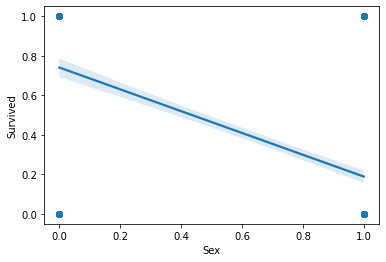

In [189]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=titanic)

# 2. Use a confusion matrix to validate your model. 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       137
           1       0.83      0.70      0.76        86

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



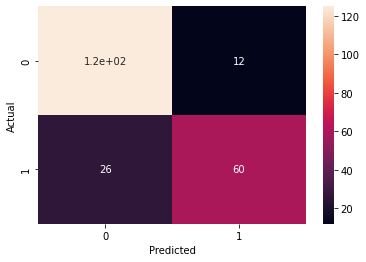

In [191]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# 3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

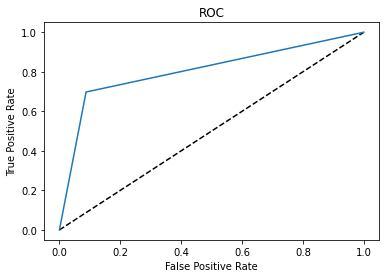

In [193]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [194]:
auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

0.8050415888643694
